## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
single_image = X_train[0]

In [5]:
single_image.shape

(32, 32, 3)

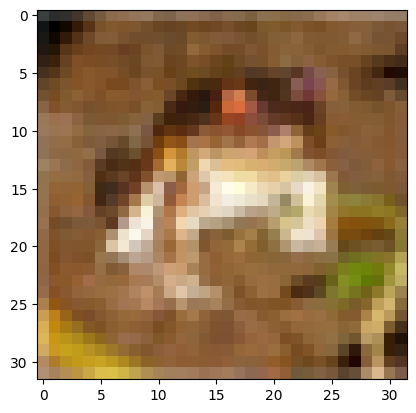

In [6]:
plt.imshow(single_image)

## Data Preprocessing

### Normalize the Data

In [7]:
single_image.max()

255

In [8]:
single_image.min()

0

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
scaled_image = X_train[0]

In [11]:
scaled_image.max()

1.0

In [12]:
scaled_image.min()

0.0

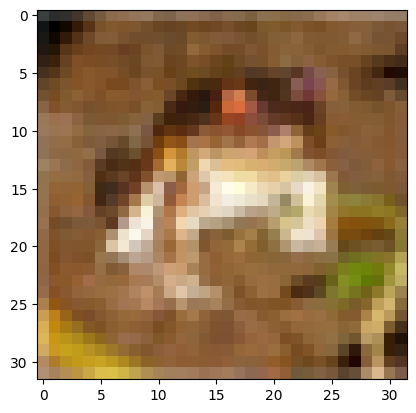

In [13]:
plt.imshow(scaled_image)

### Converting Test Labels and Training Labels into Categorical

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

## Creating the Model

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=256, activation="relu"))

model.add(Dense(units=10, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [17]:
early_stopping = EarlyStopping(monitor="val_loss",patience=1)

In [18]:
model.fit(
    x=X_train,
    y=y_cat_train,
    epochs=15,
    validation_data=(X_test, y_cat_test),
    callbacks=[early_stopping]
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3709 - loss: 1.7126 - val_accuracy: 0.5669 - val_loss: 1.2186
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5709 - loss: 1.2008 - val_accuracy: 0.5987 - val_loss: 1.1332
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6317 - loss: 1.0459 - val_accuracy: 0.6397 - val_loss: 1.0254
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6774 - loss: 0.9217 - val_accuracy: 0.6494 - val_loss: 0.9977
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7103 - loss: 0.8254 - val_accuracy: 0.6689 - val_loss: 0.9591
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7437 - loss: 0.7399 - val_accuracy: 0.6813 - val_loss: 0.9255
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7677 - loss: 0.6698 - val_accuracy: 0.6837 - val_loss: 0.9471


## Evaluating the Model

In [19]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.46010,1.492706,0.5669,1.218586
1,0.58578,1.167327,0.5987,1.133198
2,0.63994,1.024710,0.6397,1.025401
3,0.67812,0.918300,0.6494,0.997684
4,0.71084,0.823487,0.6689,0.959089
5,0.73968,0.748137,0.6813,0.925520
6,0.76332,0.681762,0.6837,0.947149


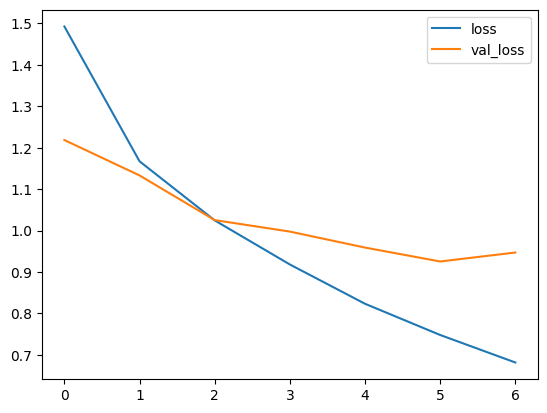

In [20]:
metrics[['loss', 'val_loss']].plot();

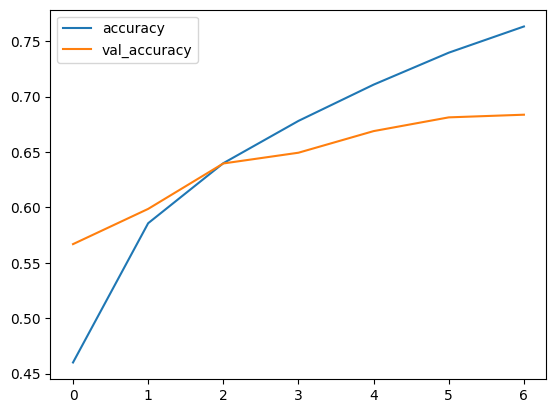

In [21]:
metrics[['accuracy', 'val_accuracy']].plot();

In [22]:
model.metrics_names

['loss', 'compile_metrics']

In [23]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9471487998962402, 0.6837000250816345]

## Predictions

In [24]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [25]:
print(classification_report(y_true=y_test, y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.83      0.82      0.82      1000
           2       0.61      0.57      0.59      1000
           3       0.48      0.53      0.50      1000
           4       0.72      0.57      0.64      1000
           5       0.49      0.68      0.57      1000
           6       0.77      0.79      0.78      1000
           7       0.76      0.72      0.74      1000
           8       0.86      0.68      0.76      1000
           9       0.81      0.71      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.70      0.68      0.69     10000



<Axes: >

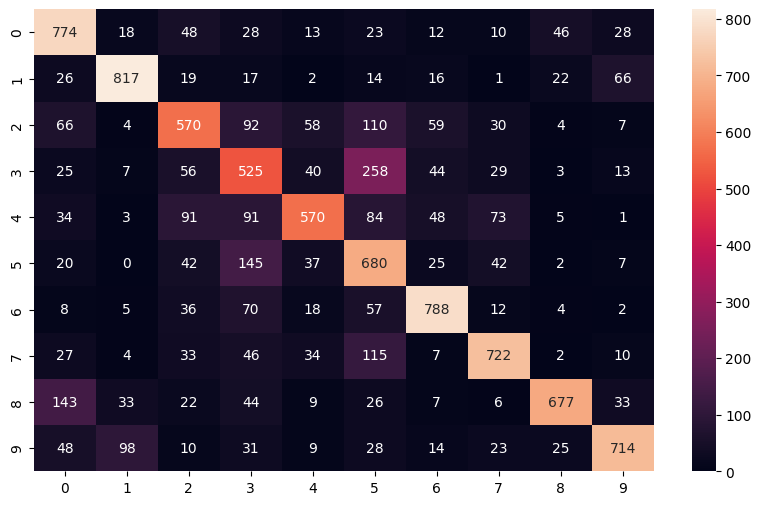

In [26]:
plt.figure(figsize=(10,6))
matrix = confusion_matrix(y_true=y_test, y_pred=predicted_classes)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## Predicting on Single Image

In [27]:
my_class = X_test[0]

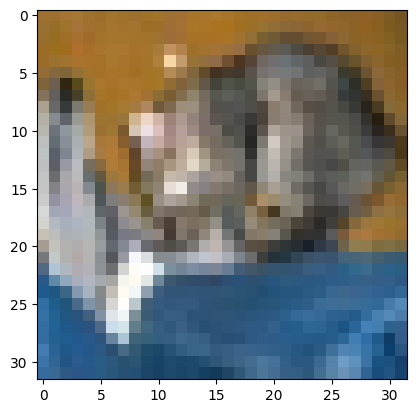

In [28]:
plt.imshow(my_class)

In [29]:
y_test[0]

array([3], dtype=uint8)

In [30]:
single_image_prediction = model.predict(my_class.reshape(1, 32, 32, 3))
predicted_class = np.argmax(single_image_prediction, axis=1)
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([3], dtype=int64)